# Lesson 15 Activity: Data Wrangling

## Learning Objectives

This activity will help you to:

1. Merge and aggregate data from multiple sources
2. Apply groupby operations to summarize data
3. Calculate meaningful statistics from aggregated data
4. Visualize aggregated results

## Setup

Import the required libraries.

In [128]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Put this at the top of your notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)  # Set a large number
pd.set_option('display.max_colwidth', None)

## Exercise 1: Merge Data and Calculate Monthly Sales

**Tasks**:

1. Merge `df_sales` and `df_dates` on the `transaction_id` column. Store the result in a dataframe called `df_transactions`.

2. Extract the month from the `sale_date` column and add it as a new column called `month` in `df_transactions`.

3. Calculate the total sales per month using groupby and sum. Store the result in a dataframe called `monthly_sales`.

4. Create a bar chart showing the total sales for each month. Include appropriate labels and title.

**Hints**:

- To merge two dataframes, use `pd.merge()` or the `.merge()` method. You can specify the column to join on with the `on` parameter.
  - Example: `df_merged = pd.merge(df1, df2, on='key_column')`
  - Or: `df_merged = df1.merge(df2, on='key_column')`

- To extract the month from a datetime column, use the `.dt.month` accessor.
  - Example: `df['month'] = df['date_column'].dt.month`

- To group by a column and calculate the sum, use `.groupby()` followed by `.sum()`.
  - Example: `grouped_df = df.groupby('group_column')['value_column'].sum()`
  - You can also use `.reset_index()` to convert the result back to a regular dataframe.

--------------------------------------------------------------------
Sales Amounts Details
             count    mean     std    min     25%     50%     75%     max
sale_amount  360.0  250.15  143.05  12.48  127.15  260.41  367.28  495.13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  360 non-null    object 
 1   sale_amount     360 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None
--------------------------------------------------------------------

--------------------------------------------------------------------
Sales By Date Details
               count unique         top freq
transaction_id   360    360     TXN0001    1
sale_date        360    227  2024-10-17    5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 2 columns):
 #   Column         

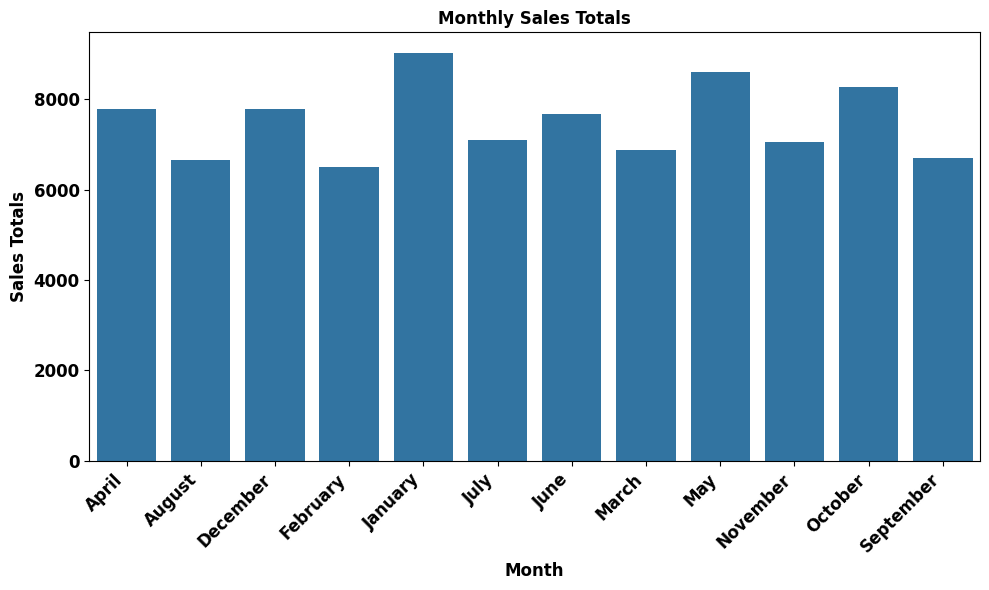

In [129]:
# Load the Sales datasets
df_sales = pd.read_csv('sale_amounts.csv')
print('--------------------------------------------------------------------')
print('Sales Amounts Details')
print(df_sales.describe().T)
print(df_sales.info())
df_sales.head()
print('--------------------------------------------------------------------')
print()

print('--------------------------------------------------------------------')
df_sales_by_date = pd.read_csv('sales_by_date.csv')
print('Sales By Date Details')
print(df_sales_by_date.describe().T)
print(df_sales_by_date.info())
df_sales_by_date.head()
print('--------------------------------------------------------------------')
print()

print('--------------------------------------------------------------------')
df_transactions = pd.merge(df_sales, df_sales_by_date, on='transaction_id')
print('Merged DataFrames:')
df_transactions['month'] = pd.to_datetime(df_transactions['sale_date']).dt.month_name()
print(df_transactions.head(20))
print('--------------------------------------------------------------------')

print('--------------------------------------------------------------------')
print('Monthly Sales Totals:')
df_monthly_sales = df_transactions.groupby('month')['sale_amount'].sum().reset_index()
df_monthly_sales.columns = ['month', 'monthly_sales_total']

print(df_monthly_sales.head(20))
print('--------------------------------------------------------------------')



plt.figure(figsize=(10, 6))

sns.barplot(data=df_monthly_sales,
            x='month',
            y='monthly_sales_total')

plt.title('Monthly Sales Totals', fontweight='bold',fontsize=12)
plt.xlabel('Month', fontweight='bold',fontsize=12)
plt.ylabel('Sales Totals', fontweight='bold',fontsize=12)
plt.xticks(fontweight='bold',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

## Exercise 2: Analyze Missing Data Patterns

Load the California Housing dataset with missing values and investigate whether the pattern of missing data in the `HouseAge` feature is related to the `Population` feature.

**Background**: 
Sometimes data is not missing completely at random. In real-world scenarios, certain values might be more likely to be missing based on other features in the dataset. This is called Missing Not At Random (MNAR). Understanding these patterns is important for choosing appropriate imputation strategies.

**Tasks**:

1. Load the dataset from `salted_housing_data.csv` and examine the first few rows.

2. Create a new boolean column called `HouseAge_Missing` that indicates whether `HouseAge` is missing (True) or not (False).

3. Use `pd.qcut()` to bin the `Population` feature into 4 quartiles. Store the result in a new column called `Population_Quartile`. Use labels like `['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']`.

4. Calculate the percentage of missing `HouseAge` values for each population quartile. Use `groupby()` to group by `Population_Quartile` and calculate:
   - The count of missing values (sum of `HouseAge_Missing`)
   - The total count in each quartile
   - The percentage missing

5. Create a bar chart showing the percentage of missing `HouseAge` values by population quartile. Add value labels on top of each bar.

6. Based on your analysis, answer: Is `HouseAge` more likely to be missing in certain population groups? What does this suggest about the missing data mechanism?

**Hints**:

- To check for missing values, use `.isnull()` or `.isna()`.
  - Example: `df['HouseAge_Missing'] = df['HouseAge'].isnull()`

- To create quartile bins, use `pd.qcut()` with `q=4`.
  - Example: `df['quartile'] = pd.qcut(df['column'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])`

- To calculate percentage missing by group:
  - Group by the quartile column
  - Use `.agg()` with multiple functions: `{'HouseAge_Missing': ['sum', 'count']}`
  - Calculate percentage: `(sum / count) * 100`

- Missing data mechanisms:
  - **MCAR** (Missing Completely At Random): No relationship between missingness and any variable
  - **MAR** (Missing At Random): Missingness depends on observed variables
  - **MNAR** (Missing Not At Random): Missingness depends on the missing value itself or unobserved variables

--------------------------------------------------------------------
California Housing Details
               count     mean      std     min     25%      50%      75%       max
MedInc       19094.0     3.87     1.91    0.50    2.56     3.53     4.74     15.00
HouseAge     20451.0    28.64    12.59    1.00   18.00    29.00    37.00     52.00
AveRooms     19141.0     5.43     2.48    0.85    4.44     5.23     6.05    141.91
AveBedrms    17282.0     1.10     0.46    0.33    1.01     1.05     1.10     34.07
Population   17075.0  1425.50  1137.03    3.00  788.00  1166.00  1728.00  35682.00
AveOccup     17596.0     3.09    11.24    0.69    2.43     2.82     3.29   1243.33
Latitude     17938.0    35.64     2.14   32.54   33.93    34.26    37.72     41.95
Longitude    16631.0  -119.57     2.00 -124.30 -121.80  -118.51  -118.01   -114.47
MedHouseVal  19553.0     2.07     1.15    0.15    1.20     1.80     2.65      5.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 2063

C:\Users\jxbma\AppData\Local\Temp\ipykernel_45804\2897129009.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_quartile = df_housing.groupby('Population_Quartile').agg(


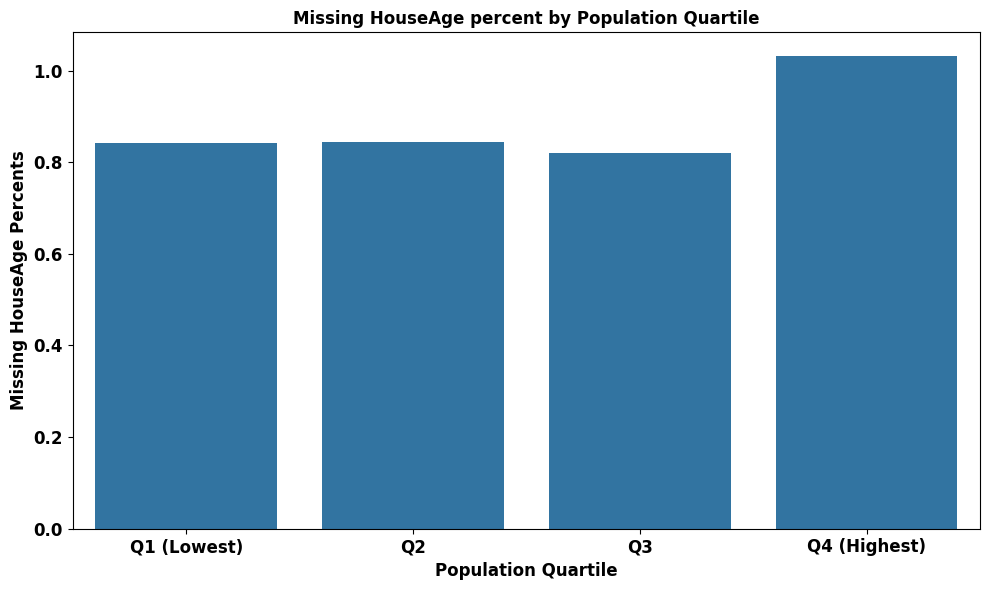

In [130]:
# Load the Sales datasets
df_housing = pd.read_csv('salted_housing_data.csv')
print('--------------------------------------------------------------------')
print('California Housing Details')
print(df_housing.describe().T)
print(df_housing.info())
print()
# Shows both count and percentage of missing values
missing = pd.DataFrame({
    'missing_count': df_housing.isnull().sum(),
    'missing_percent': (df_housing.isnull().sum() / len(df_housing)) * 100
})
print('Missing Data')
print(missing)
print()
df_housing.head()
print('--------------------------------------------------------------------')
print()

print('--------------------------------------------------------------------')
print()
df_housing['HouseAge_Missing'] = df_housing['HouseAge'].isnull()
print('Housing Data With Null Column Indicator')
print(df_housing.head(20))
print()
print('--------------------------------------------------------------------')

print('--------------------------------------------------------------------')
print()
df_housing['Population_Quartile'] = pd.qcut(df_housing['Population'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
print('Population Quartiles')
print(df_housing.head(20))
print()
print('--------------------------------------------------------------------')

missing_by_quartile = df_housing.groupby('Population_Quartile').agg(
                                                                    missing_count=('HouseAge_Missing', 'sum'),
                                                                    total_count=('HouseAge_Missing', 'count')
                                                                )

# Step 4: Calculate percentage
print('--------------------------------------------------------------------')
print()
missing_by_quartile['missing_percent'] = (missing_by_quartile['missing_count'] / missing_by_quartile['total_count']) * 100

print('Missing HouseAge percent by Population Quartile')
print(missing_by_quartile)
print()
print('--------------------------------------------------------------------')

plt.figure(figsize=(10, 6))

sns.barplot(data=missing_by_quartile,
            x='Population_Quartile',
            y='missing_percent')

plt.title('Missing HouseAge percent by Population Quartile', fontweight='bold',fontsize=12)
plt.xlabel('Population Quartile', fontweight='bold',fontsize=12)
plt.ylabel('Missing HouseAge Percents', fontweight='bold',fontsize=12)
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()


## Exercise 3: Apply Imputation to Missing Data

Now that you've analyzed the missing data pattern, select and apply an appropriate imputation method to fill in the missing `HouseAge` values.

**Background**:
Based on your findings from Exercise 2, you discovered that `HouseAge` is more likely to be missing in areas with lower population (MNAR pattern). This information should guide your choice of imputation method. Advanced methods like KNN or Iterative Imputation can leverage relationships between features, which is particularly useful when data is not missing completely at random.

**Tasks**:

1. Choose an imputation method. Consider:
   - Simple methods: Mean or Median imputation
   - Advanced methods: KNN Imputation or Iterative Imputation
   - Justify your choice based on the missing data pattern you discovered
2. Apply your chosen imputation method to fill the missing `HouseAge` values. Store the result in a new column called `HouseAge_imputed`.

3. Compare the distribution of the original `HouseAge` (non-missing values only) with the imputed values:
   - Create a histogram showing both distributions
   - Calculate summary statistics (mean, median, std) for both

4. Evaluate your imputation:
   - Does the imputed distribution look reasonable compared to the original?
   - Are there any obvious problems or artifacts introduced by the imputation?
   - Would a different method have been better? Why or why not?

--------------------------------------------------------------------

Missing HouseAge Replace Data Techniques

Missing HouseAge Mean:29.0
Missing HouseAge Median:29.0
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal  HouseAge_Missing Population_Quartile  Missing_HouseAge_With_Mean  Missing_HouseAge_With_Median  HouseAge_KNN_Imputed  HouseAge_Iterative_Imputed
0     8.33      41.0      6.98       1.02       322.0      2.56     37.88    -122.23         4.53             False         Q1 (Lowest)                        41.0                          41.0                  41.0                        41.0
1     8.30      21.0      6.24       0.97      2401.0      2.11     37.86    -122.22         3.58             False        Q4 (Highest)                        21.0                          21.0                  21.0                        21.0
2     7.26      52.0      8.29       1.07       496.0      2.80     37.85        NaN         3.52   

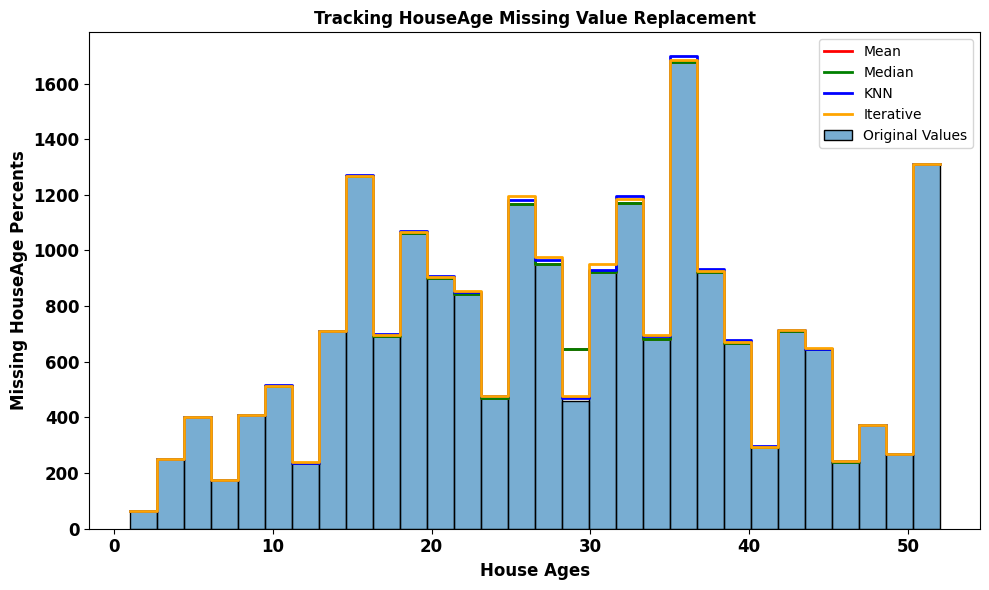

count    20640.00
mean        28.64
std         12.53
min          1.00
25%         18.00
50%         29.00
75%         37.00
max         52.00
Name: Missing_HouseAge_With_Mean, dtype: float64


In [ ]:

# Replace missing data with mean()
print('--------------------------------------------------------------------')
print()
print('Missing HouseAge Replace Data Techniques')
print()

print(f'Missing HouseAge Mean:{float(round(df_housing['HouseAge'].mean()))}')
df_housing['Missing_HouseAge_With_Mean'] = df_housing['HouseAge'].fillna(float(round(df_housing['HouseAge'].mean())))

print(f'Missing HouseAge Median:{float(round(df_housing['HouseAge'].median()))}')
df_housing['Missing_HouseAge_With_Median'] = df_housing['HouseAge'].fillna(float(round(df_housing['HouseAge'].median())))

# Exclude these columns -  They shouldn't be used in imputation
cols_to_exclude = ['Missing_HouseAge_With_Mean', 'Missing_HouseAge_With_Median']

# Get columns to use (all except excluded) - Get Numeric Columns 1st
numeric_cols = df_housing.select_dtypes(include=['float64', 'int64']).columns
cols_to_use = [col for col in numeric_cols if col not in cols_to_exclude]


# Fill in missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
                            imputer.fit_transform(df_housing[cols_to_use]),
                            columns=cols_to_use,
                            index=df_housing.index
                        )

df_housing['HouseAge_KNN_Imputed'] = df_imputed['HouseAge']

# Fill in missing values using Iterative Imputation
imputer = IterativeImputer(random_state=0, max_iter=10)
df_imputed = pd.DataFrame(
                            imputer.fit_transform(df_housing[cols_to_use]),
                            columns=cols_to_use,
                            index=df_housing.index
                        )

df_housing['HouseAge_Iterative_Imputed'] = df_imputed['HouseAge']

print(df_housing.head(20))
print()
print('--------------------------------------------------------------------')

print('Missing HouseAge percent by Population Quartile')
print(missing_by_quartile)
print()
print('--------------------------------------------------------------------')

plt.figure(figsize=(10, 6))

original_values = df_housing[~df_housing['HouseAge'].isnull()]['HouseAge']

sns.histplot(data=original_values, label='Original Values', bins=30, alpha=0.6)

# Plot KDE line of mean-imputed values
# sns.histplot(df_housing['Missing_HouseAge_With_Mean'], bins=30, label='Mean Imputed', 
#              element='step', fill=False, color='red', linewidth=2)

sns.histplot(df_housing['Missing_HouseAge_With_Mean'], bins=30, label='Mean', 
             element='step', fill=False, color='red', linewidth=2)

# Plot KDE line of mean-imputed values
#sns.kdeplot(df_housing['Missing_HouseAge_With_Median'], color='green', linewidth=2, label='Mean Imputed')
sns.histplot(df_housing['Missing_HouseAge_With_Median'], bins=30, label='Median', 
             element='step', fill=False, color='green', linewidth=2)

# Plot KDE line of mean-imputed values
#sns.kdeplot(df_housing['HouseAge_KNN_Imputed'], color='blue', linewidth=2, label='Mean Imputed')
sns.histplot(df_housing['HouseAge_KNN_Imputed'], bins=30, label='KNN', 
             element='step', fill=False, color='blue', linewidth=2)

# Plot KDE line of mean-imputed values
#sns.kdeplot(df_housing['HouseAge_Iterative_Imputed'], color='orange', linewidth=2, label='Mean Imputed')
sns.histplot(df_housing['HouseAge_Iterative_Imputed'], bins=30, label='Iterative', 
             element='step', fill=False, color='orange', linewidth=2)

plt.title('Tracking HouseAge Missing Value Replacement', fontweight='bold',fontsize=12)
plt.xlabel('House Ages', fontweight='bold',fontsize=12)
plt.ylabel('Missing HouseAge Percents', fontweight='bold',fontsize=12)
plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Mean Imputation: Mean:{df_housing['Missing_HouseAge_With_Mean'].mean()} Median:{df_housing['Missing_HouseAge_With_Mean'].median()} STD:{df_housing['Missing_HouseAge_With_Mean'].std()}')
print(f'Mean Imputation: Mean:{df_housing['Missing_HouseAge_With_Median'].mean()} Median:{df_housing['Missing_HouseAge_With_Median'].median()} STD:{df_housing['Missing_HouseAge_With_Median'].std()}')
print(f'Mean Imputation: Mean:{df_housing['HouseAge_KNN_Imputed'].mean()} Median:{df_housing['HouseAge_KNN_Imputed'].median()} STD:{df_housing['HouseAge_KNN_Imputed'].std()}')
print(f'Mean Imputation: Mean:{df_housing['HouseAge_Iterative_Imputed'].mean()} Median:{df_housing['HouseAge_Iterative_Imputed'].median()} STD:{df_housing['HouseAge_Iterative_Imputed'].std()}')